# Prep

In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
from skimage.color import label2rgb
from skimage.exposure import adjust_gamma, equalize_adapthist
from skimage.measure import label, regionprops
from skimage.morphology import disk, binary_opening
from skimage.morphology import remove_small_objects

from src.fish import find_fish_props, get_head
from src.fish import get_two_sides_img
from src.models import BoundingBox
from src.models import InputImage
from src.utils import normalize_0_255
from src.well import find_well_props

In [2]:
uniform_fig = (50, 40)

In [3]:
def plot_images(images, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary',
                title=None, hist=False, nums=False):
    if count is not None:
        images = images[0:count]

    l = len(images)

    if cols is None:
        cols = 4

    rows = int(l / cols)
    if l < cols: cols = l
    if l % cols != 0 or rows == 0:
        rows += 1

    fig, ax = plt.subplots(rows, cols, figsize=fig)
    ax = ax.ravel()
    for i, img in enumerate(images):
        if i >= l: return

        if nums: ax[i].set_title(f'#{i}')

        if not hist:
            ax[i].imshow(img, cmap)
            if not ticks:  # turn off ticks
                ax[i].get_xaxis().set_visible(False)
                ax[i].get_yaxis().set_visible(False)
        else:
            ax[i].hist(img.ravel(), bins=256)
    fig.suptitle(title, fontsize=56)
    plt.tight_layout()


def plot_fishes(fishes, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary'):
    images = list(map(lambda x: x.processed, fishes))  # Change this!
    plot_images(images, cols, count, fig, ticks, cmap)

In [4]:
from src.fish import get_possible_fish

os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src\\models\\images\\in')
fish_names = os.listdir()
os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src')
fishes = []  #[InputImage("zf20.JPG"), InputImage("zf21.JPG"), InputImage("zf3.JPG"), InputImage("zf24.JPG"),InputImage("zf5.JPG"), InputImage("zf9.JPG"), InputImage("zf7.JPG"), InputImage("zf18.JPG")]

#fishes.append(InputImage('zf5.jpg'))
for name in fish_names:
    fishes.append(InputImage(name))

#[InputImage("zf11.JPG"), InputImage("zf12.JPG"), InputImage("zf13.JPG"), InputImage("zf14.JPG"),InputImage("zf15.JPG"), InputImage("zf16.JPG"), InputImage("zf9.JPG"), InputImage("zf10.JPG")]
#[InputImage("zf1.JPG"), InputImage("zf2.JPG"), InputImage("zf3.JPG"), InputImage("zf4.JPG"), InputImage("zf5.JPG"), InputImage("zf6.JPG"), InputImage("zf7.JPG"), InputImage("zf8.JPG")]

for i, fish in enumerate(fishes):
    print(f'#{i}')
    fish.processed = normalize_0_255(fish.processed)  # Normalizing intensity
    fish = find_well_props(fish)

    fish = get_possible_fish(fish)

C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf1.JPG
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf10.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf11.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf12.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf13.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf14.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf15.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf16.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf17.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf18.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf19.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf2.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf20.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf21.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf22.jpg
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf2

C:\Users\gimes\.miniconda\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)


# Applying yen-threshold
_____________________________________________________________
# Removing meniscus
_____________________________________________________________
# Keeping only the possible fish
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box of fish
_____________________________________________________________
# Refining mask
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box from OG
_____________________________________________________________
#1
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for we

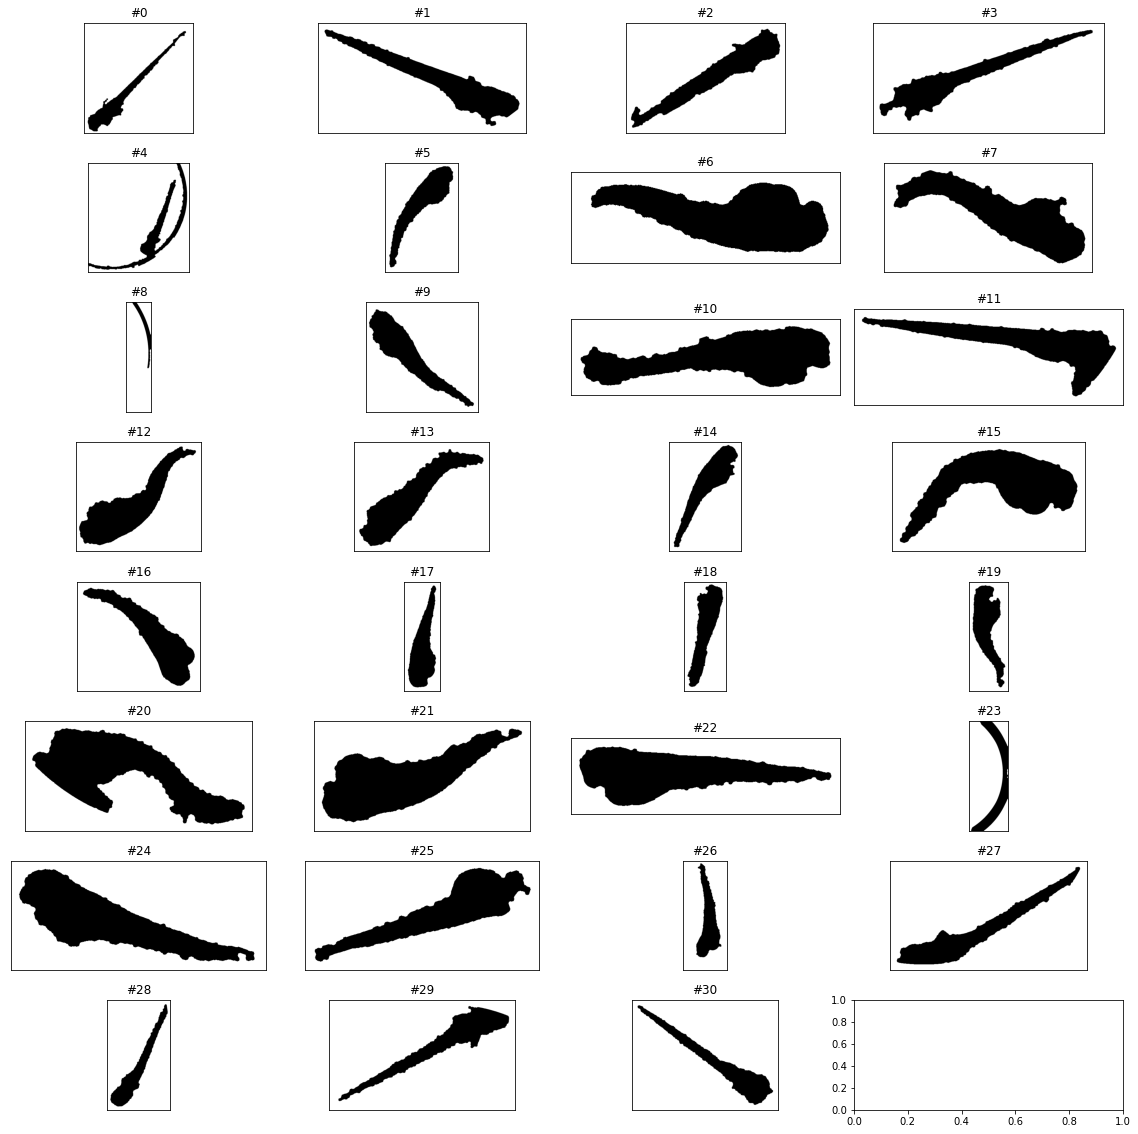

In [5]:
cropped = []
_close = []

for i, fish in enumerate(fishes):
    cropped.append(fish.fish_props.mask.cropped)
plot_images(cropped, cmap='binary', nums=True)

mean: 0.43331445656991197
mean: 0.5212123755069622
mean: 0.20220631546477297
mean: 0.3643175089510918
mean: 0.27980161704833695
mean: 0.4053414441389059
mean: 0.5593453931754935
mean: 0.6021638631451497
mean: 0.19653328774355916
mean: 0.25930295149623994
mean: 0.30880107385459293
mean: 0.5884740442123034
mean: 0.1992993057181012
mean: 0.1899390723093176
mean: 0.4004370291258917
mean: 0.4409885387076032
mean: 0.5133795414153163
mean: 0.5047365514870419
mean: 0.3153662479223506
mean: 0.3341193127541813
mean: 0.2882041496521197
mean: 0.23993400447445873
mean: 0.44343626374275447
mean: 0.3902396151974822
mean: 0.2869129445576956
mean: 0.4547371857101025
mean: 0.5927126402261026
mean: 0.4386331241625132
mean: 0.39823186100128105
mean: 0.32581469058922324
mean: 0.2845268743965858


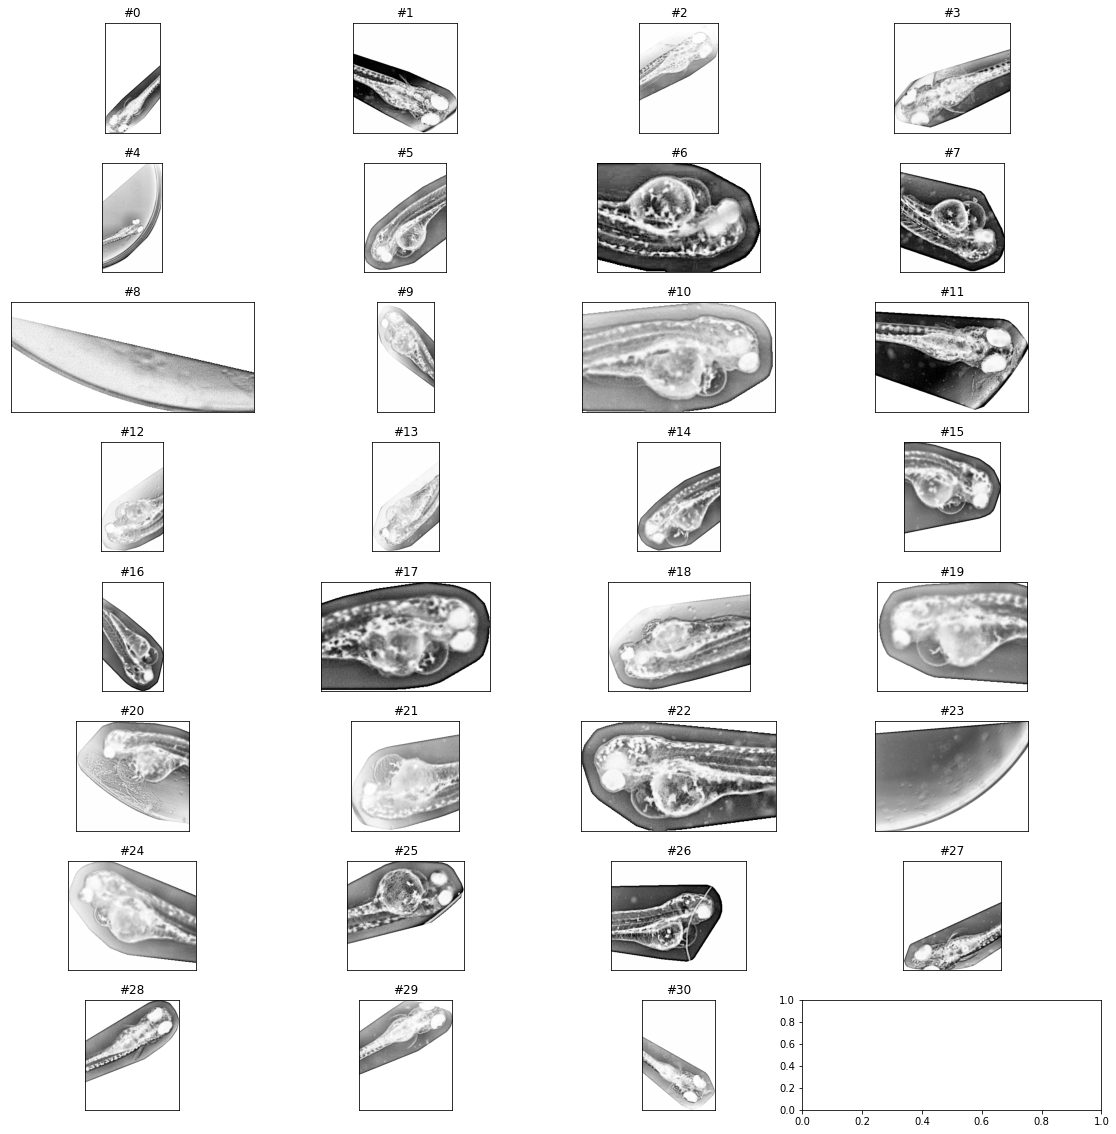

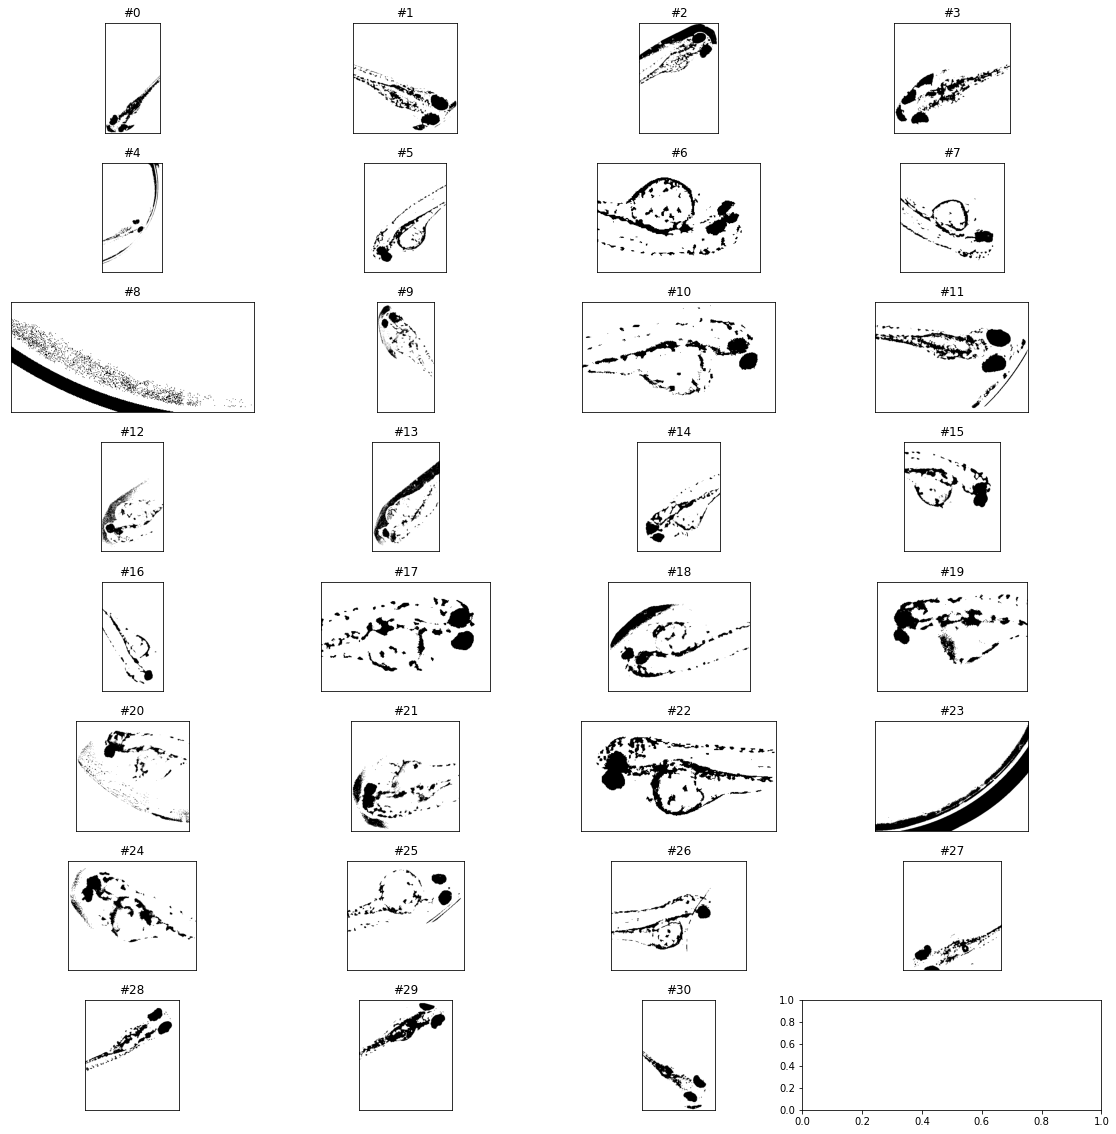

In [6]:
from skimage.morphology import square
from src.utils import show_img
from skimage.filters._unsharp_mask import unsharp_mask

eyes = []
maskeds = []
maskes = []


def should_be_rotated(img: np.ndarray) -> bool:
    if img.shape[0] > img.shape[1]:
        print('Image is rotated!')
        return True
    return False


for i, fish in enumerate(fishes):

    # mask = fishes[i].fish_props.mask.cropped

    mask = fishes[i].fish_props.mask.og
    masked = adjust_gamma((unsharp_mask(fish.fish_props.cropped_og, radius=2.5) * mask), gamma=2)

    if fish.fish_props.rotated:
        masked = np.transpose(masked)
        mask = np.transpose(mask)

    sides = get_two_sides_img(masked)  #masked)
    sides_mask = get_two_sides_img(mask)
    sides_mask_ = get_two_sides_img(fish.fish_props.mask.cropped)

    #head, side = get_head(masked)
    head, side = get_head(fishes[i].fish_props.mask.cropped)
    if side == 'l':
        fish.fish_props.head = 'l'
        head = sides[0]
        head_mask = sides_mask[0]
        maskes.append(sides_mask_[0])
    else:
        fish.fish_props.head = 'r'
        head = sides[1]
        head_mask = sides_mask[1]
        maskes.append(sides_mask_[1])

    head = equalize_adapthist(head)

    mean = np.mean(head[head_mask != 0])

    th = (head < mean * 0.3) * head_mask

    print(f'mean: {mean}')

    eyes.append(head)
    maskeds.append(th)

plot_images(eyes, cmap='binary', nums=True)
plot_images(maskeds, cmap='binary', nums=True)

In [7]:

from src.utils import keep_2_largest_object
from skimage.morphology import binary_dilation

eyess = []
hinds = []
largests = []

from src.fish import eye_spy, remove_hind_objects

for i, fish in enumerate(maskeds):
    print(f'#{i}')
    eye = eye_spy(fish)

    print(fishes[i].fish_props.head)
    post_ey = remove_hind_objects(eye, fishes[i].fish_props.head)

    hinds.append(eye.astype(float) + post_ey.astype(float))

    post_eye = binary_dilation(post_ey, disk(2))
    post_eye = keep_2_largest_object(post_eye)

    largests.append(eye.astype(float) + post_eye.astype(float))

    eyess.append(post_eye)

#0
# Searching for eye regions
_____________________________________________________________
l
# Removing objects close to the middle of the embryo
_____________________________________________________________
#1
# Searching for eye regions
_____________________________________________________________
r
# Removing objects close to the middle of the embryo
_____________________________________________________________
#2
# Searching for eye regions
_____________________________________________________________
r
# Removing objects close to the middle of the embryo
_____________________________________________________________
#3
# Searching for eye regions
_____________________________________________________________
l
# Removing objects close to the middle of the embryo
_____________________________________________________________
#4
# Searching for eye regions
_____________________________________________________________
r
# Removing objects close to the middle of the embryo
____________

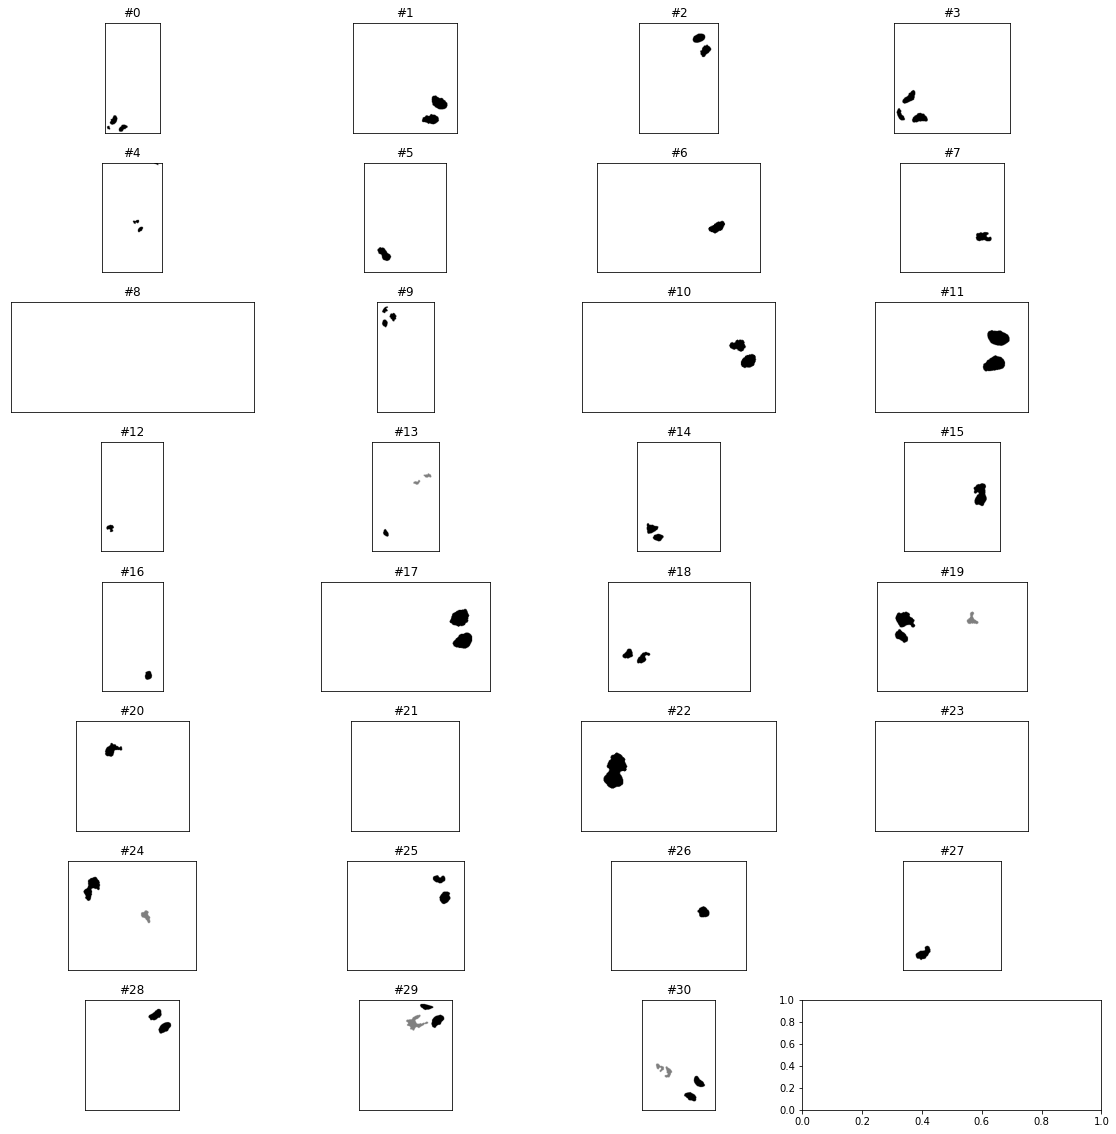

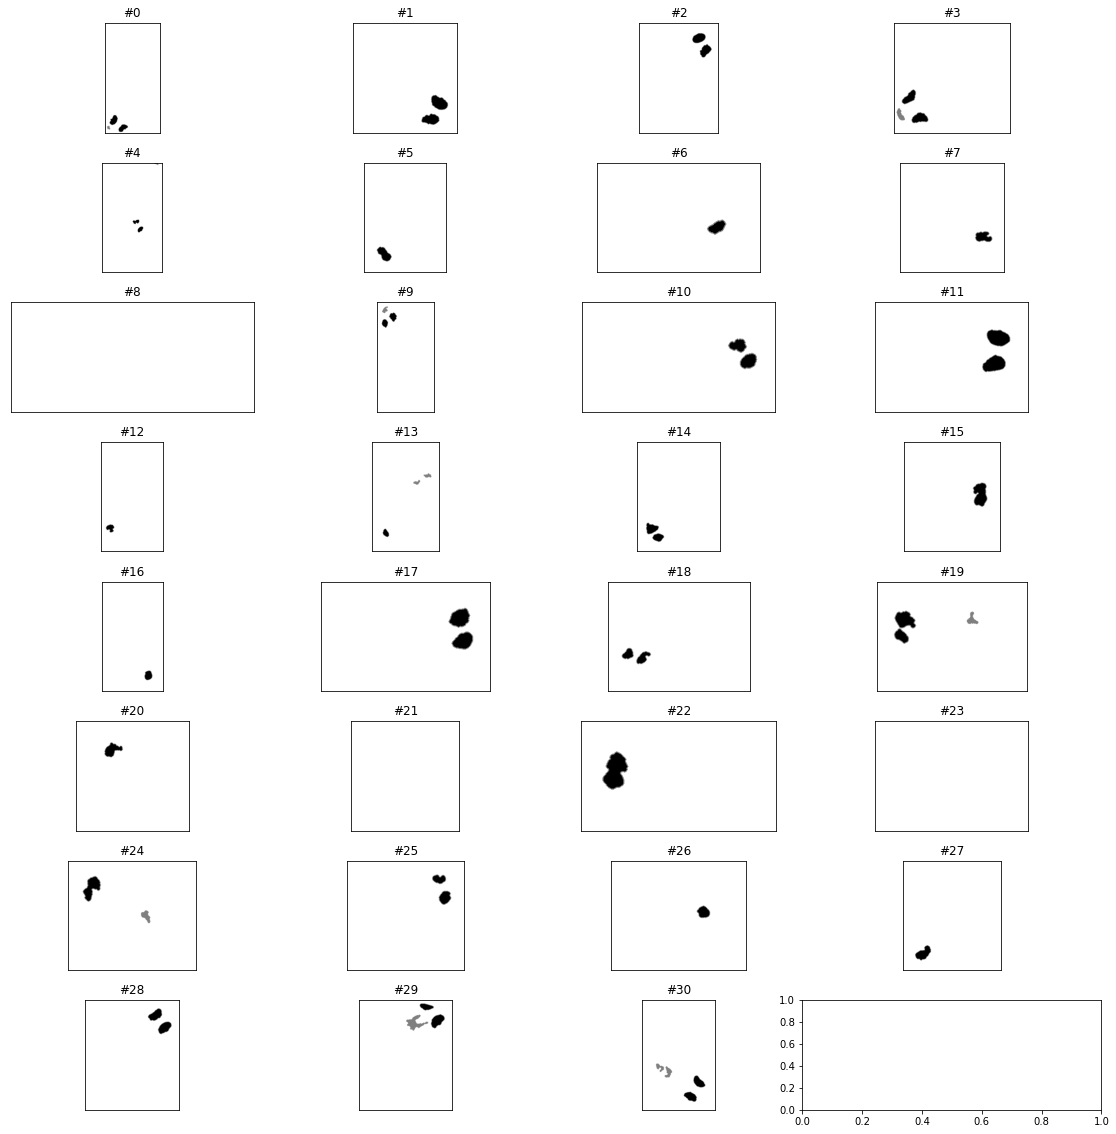

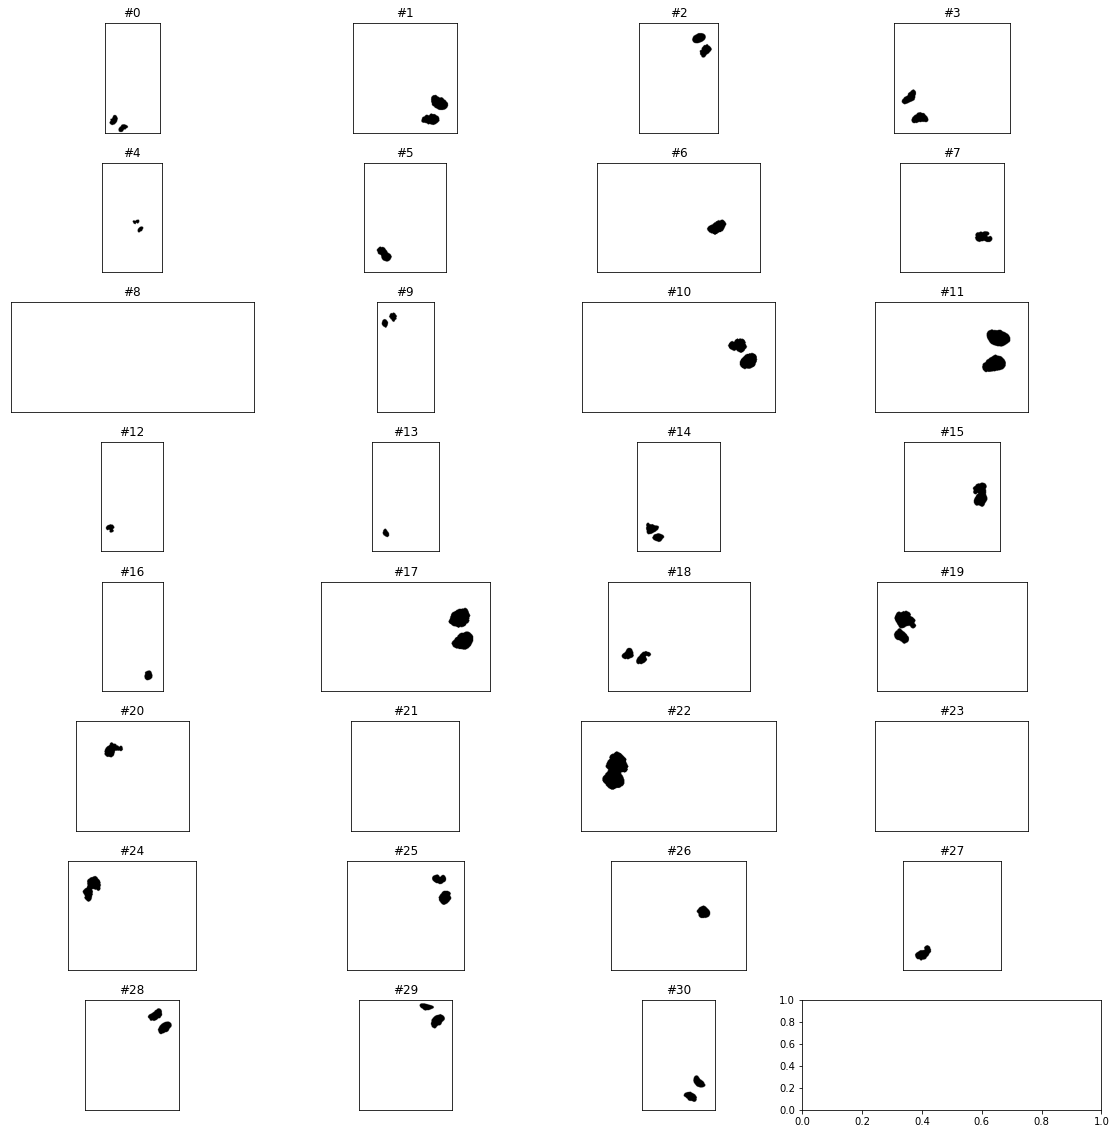

In [8]:
plot_images(hinds, nums=True)
plot_images(largests, nums=True)
plot_images(eyess, nums=True)

In [ ]:
plt.imshow(fishes[5].fish_props.cropped_og, 'binary')
show_img(fishes[5].fish_props.cropped_og)
show_img(fishes[5].fish_props.mask.og)
show_img(fishes[5].fish_props.bounding_box_og.bound_img(fishes[5].og))